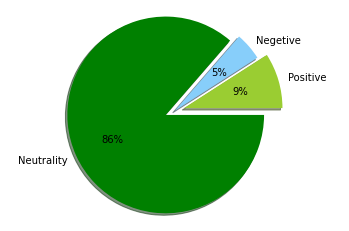



Positive tweets:
@RGVzoomin  #RGV  Producer Reveals Ram Gopal Varma Real Character : watch Here : https://t.co/7JgDG9gbDc
RT @varma_Anish: @RGVzoomin Plot twist, 

Ram Gopal Varma wants world not to forget how Chiranjeevi is trolled by Garikipaati 🤣🤣🤣 

He is t…


Negative tweets:
Calling the ban on music in pubs past 10 in the night as Talibanisation of #Hyderabad, film director Ram Gopal Varm… https://t.co/Tk072SqsTa


Neutral tweets:
Filmmaker Ram Gopal Varma has slammed no music after 10 p.m. order in #Hyderabad pubs, wondering "if the city was u… https://t.co/LL7wMHI6IO
RT @hari__MB: No Once Can Replace Mahesh Babu In Industry - Ram Gopal Varma 🔥💥 https://t.co/XaVEMq9zns
RT @sachdeva_pankaj: Ram Gopal Varma in his biography on the songs of Rangeela. https://t.co/85Ezu1V40M
Hyderabad: Filmmaker Ram Gopal Varma has slammed no music after 10 p.m. order in Hyderabad pubs, wondering “if the… https://t.co/sOieYO4RMk
RT @SaReYNuVZoonGaY: No Once Can Replace Mahesh Babu In Industry - Ra

In [ ]:
import re
import tweepy
from tweepy import OAuthHandler
from textblob import TextBlob
import matplotlib.pyplot as plt

class TwitterClient(object):
    '''
    Generic Twitter Class for sentiment analysis.
    '''

    def __init__(self):
        '''
        Class constructor or initialization method.
        '''
        # keys and tokens from the Twitter Dev Console
        consumer_key = 'ayPpuuu876mwa7HsDcdLdv4OT'
        consumer_secret = 'JaKXacGiihef9yC3tDKbbPnxmFowNF2eF3xWWTmp1GmaNZMaRM'
        access_token = '848269201785724929-D8DHCWiudfbi9f5ochLhXU5Mj2UlyQP'
        access_token_secret = 'z1LKW2KHqf6HsihfqciTxYZYcVuAl3J7PHJ8dI6gMQWOH'

        # attempt authentication

        try:
            # create OAuthHandler object
            self.auth = OAuthHandler(consumer_key, consumer_secret)
            # set access token and secret
            self.auth.set_access_token(access_token, access_token_secret)
            # create tweepy API object to fetch tweets
            self.api = tweepy.API(self.auth)
        except:
            print("Error: Authentication Failed")

    def clean_tweet(self, tweet):
        '''
        Utility function to clean tweet text by removing links, special characters
        using simple regex statements.
        '''
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

    def get_tweet_sentiment(self, tweet):
        '''
        Utility function to classify sentiment of passed tweet
        using textblob's sentiment method
        '''
        # create TextBlob object of passed tweet text
        analysis = TextBlob(self.clean_tweet(tweet))
        # set sentiment
        if analysis.sentiment.polarity > 0:
            return 'positive'
        elif analysis.sentiment.polarity == 0:
            return 'neutral'
        elif analysis.sentiment.polarity < 0:
            return 'negative'

    def get_tweets(self, query, count = 10):
        '''
        Main function to fetch tweets and parse them.
        '''
        # empty list to store parsed tweets
        tweets = []

        try:
            # call twitter api to fetch tweets
            fetched_tweets = self.api.search(q = query, count = count)

            # parsing tweets one by one
            for tweet in fetched_tweets:
                # empty dictionary to store required params of a tweet
                parsed_tweet = {}

                # saving text of tweet
                parsed_tweet['text'] = tweet.text
                # saving sentiment of tweet
                parsed_tweet['sentiment'] = self.get_tweet_sentiment(tweet.text)

                # appending parsed tweet to tweets list
                if tweet.retweet_count > 0:
                    # if tweet has retweets, ensure that it is appended only once
                    if parsed_tweet not in tweets:
                        tweets.append(parsed_tweet)
                else:
                    tweets.append(parsed_tweet)

            # return parsed tweets
            return tweets

        except tweepy.TweepError as e:
            # print error (if any)
            print("Error : " + str(e))

def main():

    # creating object of TwitterClient Class
    api = TwitterClient()
    # calling function to get tweets
    tweets = api.get_tweets(query = 'Ram gopal varma', count = 100)

    # picking positive tweets from tweets
    ptweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positive']
    # percentage of positive tweets
    pos = format(100*len(ptweets)/len(tweets))



    # picking negative tweets from tweets
    ntweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negative']
    # percentage of negative tweets
    neg = format(100*len(ntweets)/len(tweets))


    # picking neutral tweets from tweets
    neutweets = [tweet for tweet in tweets if tweet['sentiment'] == 'neutral']
    # percentage of neutral tweets
    neu = format(100*len(neutweets)/len(tweets))



    #plotting
    import matplotlib.pyplot as plt

    # Data to plot
    labels = 'Positive', 'Negetive', 'Neutrality'
    sizes = [pos, neg, neu]
    colors = ['yellowgreen', 'lightskyblue', "green"]
    explode = (0.1, 0, 0.1)  # explode 1st slice

    # Plot
    plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.0f%%', shadow=True)

    plt.axis('equal')
    plt.show()




    # printing first 5 positive tweets
    print("\n\nPositive tweets:")
    for tweet in ptweets[:100]:
        pos_data = tweet['text']

        print(pos_data)

    # printing first 5 negative tweets
    print("\n\nNegative tweets:")
    for tweet in ntweets[:100]:
        neg_data = tweet['text']

        print(neg_data)


    # printing first 5 neutral tweets
    print("\n\nNeutral tweets:")
    for tweet in neutweets[:100]:
        neu_data = tweet['text']

        print(neu_data)

if __name__ == "__main__":
    # calling main function
    main()